In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
df = pd.read_csv('aadl_holds.csv')
df.head()

(969494, 8)

## Group by user type

In [108]:
df_pivot = df.pivot_table(index=['patron_hash'], values=['record_id'], aggfunc=len)
df_pivot

df1_pivot = df_pivot[(df_pivot['record_id'] >= 1) & (df_pivot['record_id'] <= 2)]
df1_patron_ids = df1_pivot.index.values
len(df1_patron_ids)

6776

In [109]:
df2_pivot = df_pivot[(df_pivot['record_id'] >= 3) & (df_pivot['record_id'] <= 9)]
df2_patron_ids = df2_pivot.index.values
len(df2_patron_ids)

7245

In [110]:
df3_pivot = df_pivot[(df_pivot['record_id'] >= 10) & (df_pivot['record_id'] <= 30)]
df3_patron_ids = df3_pivot.index.values
len(df3_patron_ids)

6258

In [111]:
df4_pivot = df_pivot[(df_pivot['record_id'] >= 31) & (df_pivot['record_id'] <= 3571)]
df4_patron_ids = df4_pivot.index.values
len(df4_patron_ids)

6584

In [112]:
df_by_users = df.groupby('patron_hash')
df_by_users.count().shape

(26863, 7)

In [113]:
df1 = df[df.patron_hash.isin(df1_patron_ids)]
df1.shape

(9261, 8)

In [114]:
df2 = df[df.patron_hash.isin(df2_patron_ids)]
df2.shape

(38415, 8)

In [115]:
df3 = df[df.patron_hash.isin(df3_patron_ids)]
df3.shape

(111634, 8)

In [116]:
df4 = df[df.patron_hash.isin(df4_patron_ids)]
df4.shape

(810184, 8)

In [120]:
num_users_by_group = [len(df1_patron_ids), len(df2_patron_ids), len(df3_patron_ids), len(df4_patron_ids)]
total_num_users = len(df1_patron_ids) + len(df2_patron_ids) + len(df3_patron_ids) + len(df4_patron_ids)
percent_users_by_group = [num_users/total_num_users * 100 for num_users in num_users_by_group]
percent_users_by_group

[25.22428619290474, 26.970182034769014, 23.295983322785986, 24.50954844954026]

In [122]:
requests_by_group = [len(df1), len(df2), len(df3), len(df4)]
total_requests = len(df1) + len(df2) + len(df3) + len(df4)
percent_requests_by_group = [requests/total_requests * 100 for requests in requests_by_group]
percent_requests_by_group

[0.9552405687915553, 3.9623762498788024, 11.5146664136137, 83.56771676771594]

In [136]:
num_holds = ['1 - 2 holds', '3 - 9 holds', '10 - 30 holds', '31 - 3571 holds']
num_holds

['1 - 2 holds', '3 - 9 holds', '10 - 30 holds', '31 - 3571 holds']

In [137]:
df_results = pd.DataFrame(data={'num_holds': num_holds, 
                                'percent_users': percent_users_by_group, 
                                'percent_holds': percent_requests_by_group}, 
                          index=['Group 1', 'Group 2', 'Group 3', 'Group 4'])
df_results

,num_holds,percent_holds,percent_users
Group 1,1 - 2 holds,0.955241,25.224286
Group 2,3 - 9 holds,3.962376,26.970182
Group 3,10 - 30 holds,11.514666,23.295983
Group 4,31 - 3571 holds,83.567717,24.509548


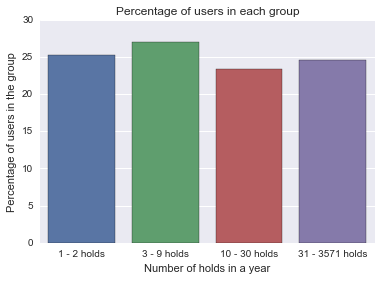

In [138]:
sns.barplot(x='num_holds', y='percent_users', data=df_results)
plt.xlabel('Number of holds in a year')
plt.ylabel('Percentage of users in the group')
plt.title('Percentage of users in each group')

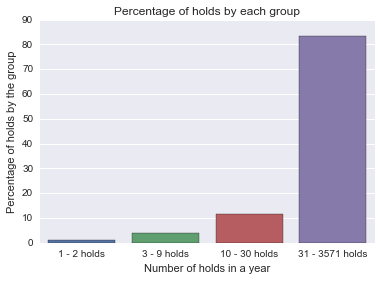

In [139]:
sns.barplot(x='num_holds', y='percent_holds', data=df_results)
plt.xlabel('Number of holds in a year')
plt.ylabel('Percentage of holds by the group')
plt.title('Percentage of holds by each group')

In [183]:
df['patron_group'] = ['G1']*len(df)
df.ix[df.patron_hash.isin(df1_patron_ids), 'patron_group'] = 'G1'
df.ix[df.patron_hash.isin(df2_patron_ids), 'patron_group'] = 'G2'
df.ix[df.patron_hash.isin(df3_patron_ids), 'patron_group'] = 'G3'
df.ix[df.patron_hash.isin(df4_patron_ids), 'patron_group'] = 'G4'
df.shape

(969494, 9)

In [212]:
df_pivot_books = df.pivot_table(index=['record_id', 'patron_group'], values=['patron_hash'], aggfunc=len)
df_pivot_books['score'] = [0]*len(df_pivot_books)
df_pivot_books

,,patron_hash,score
record_id,patron_group,,
1000002,G4,1,0
1000007,G4,1,0
1000009,G4,3,0
1000011,G4,1,0
1000012,G4,3,0
1000018,G4,1,0
1000021,G3,1,0
1000035,G4,1,0
1000038,G3,1,0


In [221]:
record_nums = [1000002, 1000007]
df_pivot_books.ix[1000002, 'patron_hash']

patron_group
G4    1
Name: patron_hash, dtype: int64

## Group by material type

In [29]:
df_by_user = df.groupby('material_type')
df_by_user['record_id'].count()

material_type
a    440117
b       181
c      1190
e         1
f      1910
g    279915
i     50152
j    101293
k      1113
l      6855
m         1
p      1640
r      2258
s        23
t         3
u     58875
x     23964
Name: record_id, dtype: int64

In [54]:
df_by_title = df.groupby('record_id')
df_by_title.count()

df_pivot = df.pivot_table(index=['record_id'], values=['number_of_copies'], aggfunc=np.max)
df_pivot

,number_of_copies
record_id,
1000002,1
1000007,1
1000009,1
1000011,1
1000012,3
1000018,1
1000021,4
1000035,1
1000038,1
